In [1]:
import astropy

In [4]:
## To import constants 
from astropy import constants as const
## Fundamental constants
print(f"speed of light is : {const.c}")
print(f"gravitational constant is : {const.G}")
print(f"plancks constant is : {const.h}")

speed of light is : 299792458.0 m / s
gravitational constant is : 6.6743e-11 m3 / (kg s2)
plancks constant is : 6.62607015e-34 J s


In [5]:
##Astronomical constants 
print(f"solar mass is : {const.M_sun}")
print(f"earth mass is : {const.M_earth}")
print(f"parsec value is : {const.pc}")

solar mass is : 1.988409870698051e+30 kg
earth mass is : 5.972167867791379e+24 kg
parsec value is : 3.085677581491367e+16 m


## Note that we not only get the values but units as well

In [8]:
##We could also easily convert units into one form to another as 
from astropy import units as u 

In [13]:
print(f"10 m into unit of parsec is : {(10*u.m).to(u.pc)}")

10 m into unit of parsec is : 3.2407792894443647e-16 pc


## using curly braces {} inside a string without an f prefix, so Python treats it as a normal string instead of evaluating the expression inside.
## f"...": This is an f-string, which allows expressions inside {} to be evaluated.

In [8]:
## conversion of light year into various other units
from astropy import units as u
ly = 1 * u.lyr
print("Conversion of astronomical unit in other units are as foloows ")
print(f"Parsec : {ly.to(u.pc) : .4f}") ## .4f -- upto 4 decimal point digits
print(f"Metres: {ly.to(u.m) : .2e}") ## .2e -- 2 decimal point tk and uske baad wala 10 ki power mai aajayegaa 
print(f"Astronomical Unit : {ly.to(u.au) : .4e}") ## .4e -- 4 decimal digits and uske baad wala part power of 10 mai 
print(f"Kilometers : {ly.to(u.km) : .8f}") ## -- .8f matlab jo value hai woh pura and decimal k baad 8 digits tk accurate 

Conversion of astronomical unit in other units are as foloows 
Parsec :  0.3066 pc
Metres:  9.46e+15 m
Astronomical Unit :  6.3241e+04 AU
Kilometers :  9460730472580.80078125 km


 RA and Dec in Astronomy :- basically sky coordinates 
 -- icrs and galactic coordinates

In [6]:
from astropy.coordinates import SkyCoord
from astropy import units as u
# Creating a coordinate from degrees
c1 = SkyCoord(ra=10.625 * u.degree, dec=41.2 * u.degree, frame='icrs')
print(c1)

# Creating from HMS/DMS strings
c2 = SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')
print(c2)

# Galactic coordinates
c_gal = SkyCoord(l=121.1743 * u.degree, b=-21.5733 * u.degree, frame='galactic')
print(f"Galactic coordinates: {c_gal}")
print(f"Converted to ICRS: {c_gal.icrs}")

<SkyCoord (ICRS): (ra, dec) in deg
    (10.625, 41.2)>
<SkyCoord (ICRS): (ra, dec) in deg
    (10.625, 41.2)>
Galactic coordinates: <SkyCoord (Galactic): (l, b) in deg
    (121.1743, -21.5733)>
Converted to ICRS: <SkyCoord (ICRS): (ra, dec) in deg
    (10.68467197, 41.26875781)>


In [7]:
# Calculating distance between two coordinates

# Define two points on the sky
star1 = SkyCoord('00h42m44.3s', '+41d16m09s', frame='icrs')
star2 = SkyCoord('02h42m40s', '+12d16m08s', frame='icrs')

# Calculate separation
sep = star1.separation(star2)
print(f"Separation: {sep}")
print(f"Separation in arcseconds: {sep.arcsecond}\"")

Separation: 39.07385548040612 deg
Separation in arcseconds: 140665.87972946203"


FITS file -- Flexible Image Transport System 

In [8]:
from astropy.visualization import astropy_mpl_style
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
# Important
from astropy.io import fits
from astropy.utils.data import download_file

In [9]:
# %matplotlib inline
plt.style.use(astropy_mpl_style)
image_file = download_file('http://www.astropy.org/astropy-data/tutorials/FITS-images/HorseHead.fits', cache=True)

In [10]:
hdu_list = fits.open(image_file) ## hdu -- header data unit || heading / key information 
hdu_list.info() ## info -- gives the information of that file in form of list

Filename: /home/codespace/.astropy/cache/download/url/217b4fe80e6f349ef703ceed7e0be888/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


All the information about this image the date the time the filter everything the complete history and information of this image 

In [11]:
## Because it is number we could easily access them just as we access each element in an array 
hdu_list[0].header

SIMPLE  =                    T /FITS: Compliance                                
BITPIX  =                   16 /FITS: I*2 Data                                  
NAXIS   =                    2 /FITS: 2-D Image Data                            
NAXIS1  =                  891 /FITS: X Dimension                               
NAXIS2  =                  893 /FITS: Y Dimension                               
EXTEND  =                    T /FITS: File can contain extensions               
DATE    = '2014-01-09        '  /FITS: Creation Date                            
ORIGIN  = 'STScI/MAST'         /GSSS: STScI Digitized Sky Survey                
SURVEY  = 'SERC-ER '           /GSSS: Sky Survey                                
REGION  = 'ER768   '           /GSSS: Region Name                               
PLATEID = 'A0JP    '           /GSSS: Plate ID                                  
SCANNUM = '01      '           /GSSS: Scan Number                               
DSCNDNUM= '00      '        

Image is stored in like a multi dimensional array 

In [12]:
image_data = hdu_list[0].data
image_data

array([[ 7201,  6642,  6642, ...,  9498,  9498, 10057],
       [ 6642,  6363,  6642, ..., 10057, 10616, 10616],
       [ 6922,  6642,  6922, ..., 10337, 11175, 10616],
       ...,
       [ 5412,  5132,  5412, ..., 13000, 12580, 12021],
       [ 5796,  5517,  5796, ..., 12546, 12546, 11987],
       [ 5796,  5796,  6076, ..., 11987, 12546, 12546]],
      shape=(893, 891), dtype='>i2')

In [13]:
print(type(image_data)) ## Type of data -- numpy array 
print(image_data.shape) ## shape of matrx kinda -- so its not a square matrix 
## Its not x and y like 893 pixels in x and 891 pixels in y its not like that 
## as checked above its the opposite like 893 in y and 891 in x 

<class 'numpy.ndarray'>
(893, 891)


In [14]:
from astropy.visualization import astropy_mpl_style
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
# Important
from astropy.io import fits
from astropy.utils.data import download_file
## We take a pixel as our reference and then could do our further analysis 
image_data1 = fits.getdata(image_file)
image_data1
# print(image_data.shape) -- to only get data

array([[ 7201,  6642,  6642, ...,  9498,  9498, 10057],
       [ 6642,  6363,  6642, ..., 10057, 10616, 10616],
       [ 6922,  6642,  6922, ..., 10337, 11175, 10616],
       ...,
       [ 5412,  5132,  5412, ..., 13000, 12580, 12021],
       [ 5796,  5517,  5796, ..., 12546, 12546, 11987],
       [ 5796,  5796,  6076, ..., 11987, 12546, 12546]],
      shape=(893, 891), dtype='>i2')

These units are not just some random integers but of specific purpose they are actually units pf which is given in our header file
flux maps , intensity map etc or pixel value 

In [15]:
np.array_equal(image_data,image_data1) ## To check if both the data's are equal or not

True

In [16]:
hdu_list.close() #close fits file

Viewing the image data and getting basic statistics

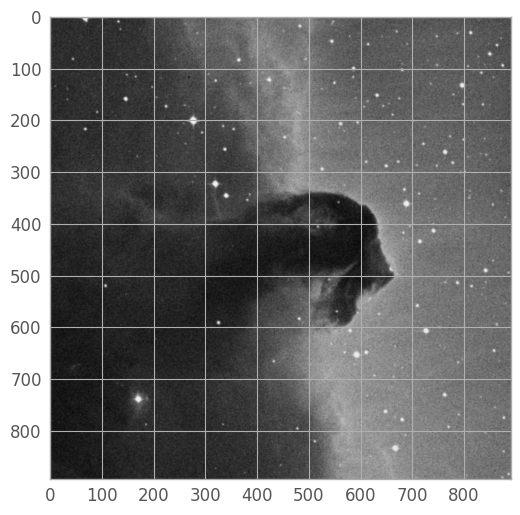

In [ ]:
# %matplotlib inline
plt.imshow(image_data, cmap='gray')  #cmap means colormap
plt.colorbar() ##-- shows color bar if required 

In [ ]:
## statistical data 
print('Min:', np.min(image_data)) # tells about the darkest pixel in an image 
print('Max:', np.max(image_data)) ## tells about the brightest pixel in the image
print('Mean:', np.mean(image_data)) ## overall brighntess or exposure is given by this 
print('Std deviation:', np.std(image_data)) ## how spread out the values is like how much dark pixels how much bright like that on a histogram type


Min: 3759
Max: 22918
Mean: 9831.481676287574
Std deviation: 3032.3927542049046


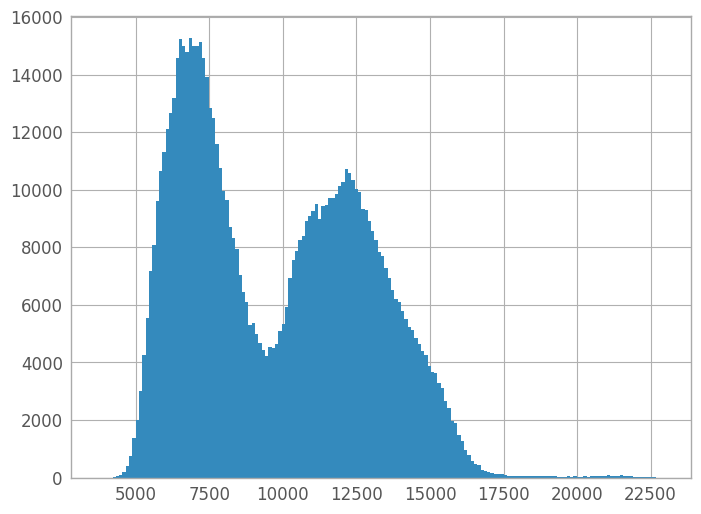

In [26]:
# histogram
image_data.flatten()
histogram = plt.hist(image_data.flatten(), bins='auto')

Working with logarithmic color scale for better understandings 
not just linear scale 
More clear image 


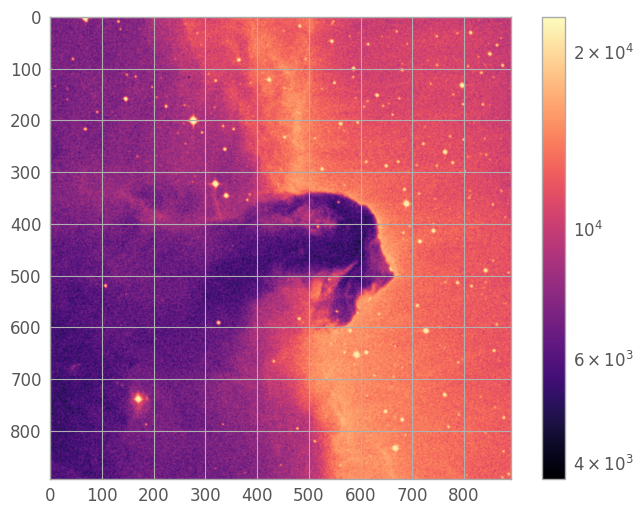

In [27]:
from matplotlib.colors import LogNorm
plt.imshow(image_data, cmap='magma', norm=LogNorm())

plt.colorbar()

Do you know why this is better? Because color makes it more visually clear and log scale enhances even the small variation.

For example: 1e-5 and 1e-4, although small but its log is -5 and -4 (Quite distinct now !!).

M42 - Orion Nebula -- ANOTHER EXAMPLE

In [33]:
# %matplotlib inline
import numpy as np
from PIL import Image
from astropy.io import fits
import matplotlib.pyplot as plt
# from astropy.visualization import astropy_mpl_style
# plt.style.use(astropy_mpl_style)
image = Image.open('./images/hubble_image.jpeg')
xsize, ysize = image.size
print("Image size: {} x {}".format(xsize, ysize))
plt.imshow(image)
np.array(image.getdata())
plt.colorbar()

FileNotFoundError: [Errno 2] No such file or directory: './images/hubble_image.jpeg'